Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


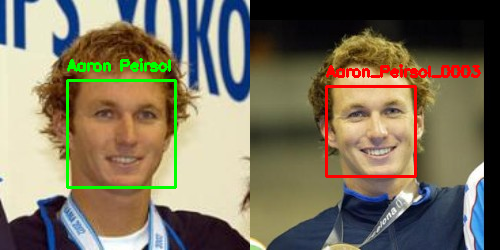

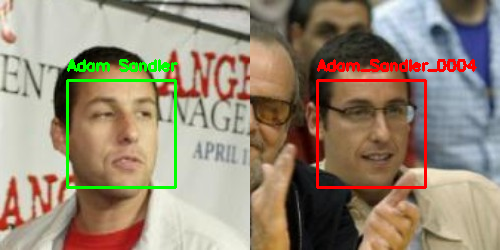

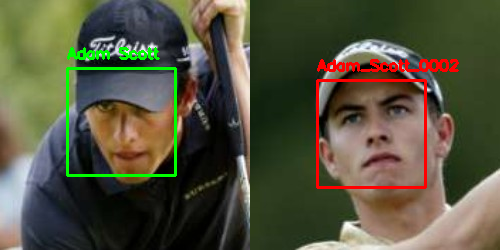

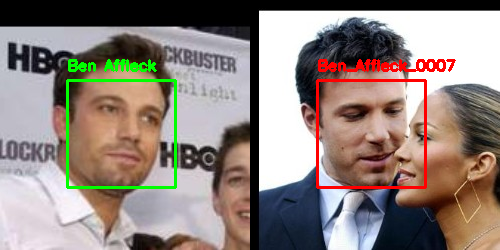

In [9]:
import os
import cv2
import numpy as np
from google.colab import drive
from google.colab.patches import cv2_imshow

!pip install face_recognition

import face_recognition

drive.mount('/content/drive')

known_faces_folder = "/content/drive/My Drive/known"
unknown_faces_folder = "/content/drive/My Drive/unknown"

known_images = []
known_image_names = []

for image_file in os.listdir(known_faces_folder):
    image_path = os.path.join(known_faces_folder, image_file)
    known_images.append(cv2.imread(image_path))
    known_image_names.append(os.path.splitext(image_file)[0])

known_images = [image for _, image in sorted(zip(known_image_names, known_images))]
known_image_names.sort()

unknown_images = []
unknown_image_names = []

for image_file in os.listdir(unknown_faces_folder):
    image_path = os.path.join(unknown_faces_folder, image_file)
    unknown_images.append(cv2.imread(image_path))
    unknown_image_names.append(os.path.splitext(image_file)[0])

unknown_images = [image for _, image in sorted(zip(unknown_image_names, unknown_images))]
unknown_image_names.sort()

for known_image, known_name, unknown_image, unknown_name in zip(known_images, known_image_names, unknown_images, unknown_image_names):
    min_height = min(known_image.shape[0], unknown_image.shape[0])
    known_image = cv2.resize(known_image, (int(known_image.shape[1] * min_height / known_image.shape[0]), min_height))
    unknown_image = cv2.resize(unknown_image, (int(unknown_image.shape[1] * min_height / unknown_image.shape[0]), min_height))

    known_face_locations = face_recognition.face_locations(known_image)
    known_face_encodings = face_recognition.face_encodings(known_image, known_face_locations)

    unknown_face_locations = face_recognition.face_locations(unknown_image)
    unknown_face_encodings = face_recognition.face_encodings(unknown_image, unknown_face_locations)

    for (top, right, bottom, left), encoding in zip(known_face_locations, known_face_encodings):
        cv2.rectangle(known_image, (left, top), (right, bottom), (0, 255, 0), 2)
        cv2.putText(known_image, known_name, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    for (top, right, bottom, left), encoding in zip(unknown_face_locations, unknown_face_encodings):
        cv2.rectangle(unknown_image, (left, top), (right, bottom), (0, 0, 255), 2)
        cv2.putText(unknown_image, unknown_name, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

    composite_image = np.concatenate((known_image, unknown_image), axis=1)

    if known_name != unknown_name:
        cv2.putText(composite_image, f"No match found for: {unknown_name}", (20, min_height + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    cv2_imshow(composite_image)
